In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# *__Definiciones de variables__*

* ID - id
* DATOP - Date of flight
* FLTID - Flight number
* DEPSTN - Departure point
* ARRSTN - Arrival point
* STD - Scheduled Time departure
* STA - Scheduled Time arrival
* STATUS - Flight status
* AC - Aircraft Code
* target - Delay Time


In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
df_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
df_train.shape

(107833, 10)

In [5]:
df_train_columns = df_train.columns
df_train_columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')

In [6]:
new_columns = ['ID', 'DATE_FLY', 'FLY_ID', 'ORIGIN_PLACE', 'ARRIVAL_PLACE', 'ORIGIN_TIME', 'ARRIVAL_TIME', 'FLIGHT_STATUS', 'AIRCRAFT_CODE', 'DELAY']
df_train.columns = new_columns

In [7]:
df_train_index = df_train.index
df_train_index

RangeIndex(start=0, stop=107833, step=1)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             107833 non-null  object 
 1   DATE_FLY       107833 non-null  object 
 2   FLY_ID         107833 non-null  object 
 3   ORIGIN_PLACE   107833 non-null  object 
 4   ARRIVAL_PLACE  107833 non-null  object 
 5   ORIGIN_TIME    107833 non-null  object 
 6   ARRIVAL_TIME   107833 non-null  object 
 7   FLIGHT_STATUS  107833 non-null  object 
 8   AIRCRAFT_CODE  107833 non-null  object 
 9   DELAY          107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [9]:
df_train.describe()

,DELAY
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


In [10]:
df_train['FLY_ID'].unique()

array(['TU 0712 ', 'TU 0757 ', 'TU 0214 ', ..., 'UG 1020 ', 'UG 1501 ',
       'UG 1004 '], dtype=object)

In [11]:
df_train['ORIGIN_PLACE'].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'ARN', 'CPH', 'CRL', 'OST', 'TNG',
       'GAF', 'NAP', 'BRQ', 'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN',
       'EBL', 'GAE', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM',
       'TBJ', 'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV',
       'CKY', 'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE',
       'CAG', 'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX',
       'FIH', 'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'VKO', 'AAE', 'BRI',
       'VRN', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'SJJ', 'KRR',

In [12]:
df_train['ARRIVAL_PLACE'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

In [13]:
df_train['FLIGHT_STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [14]:
df_train['AIRCRAFT_CODE'].unique()

array(['TU 32AIMN', 'TU 31BIMO', 'TU 736IOK', 'TU 320IMU', 'TU 736IOP',
       'TU 32AIMH', 'TU 32AIMI', 'TU 32AIMC', 'TU 31AIMK', 'TU 32AIMF',
       'TU 32AIMP', 'TU 320IMR', 'TU 332IFN', 'TU 31AIMJ', 'TU 320IMT',
       'TU 736IOL', 'TU 31BIMQ', 'TU 736IOR', 'TU 320IMV', 'TU 320IMS',
       'TU 332IFM', 'TU 320IMW', 'TU 32AIML', 'TU 32AIMD', 'TU 32AIMM',
       'TU CR9ISA', 'TU 32AIMG', 'TU 736ION', 'TU 736IOM', 'TU 736IOQ',
       '5M 343SUN', 'UG AT7LBD', '5K 343TQY', 'UG AT7LBE', 'UG AT7AT7',
       'BJ 320INP', 'BJ 320INH', 'BJ 320INQ', 'BJ 320INA', 'UG CR9XXX',
       'UG CR9CR9', 'TU 32A32A', 'BJ 320INB', 'GJ 734CGC', 'QS 738TSC',
       'PS 738PSD', 'D4 319CQG', 'BJ 320INR', 'BJ 320INC', 'UJ 320TCF',
       '5K 345TFX', 'D4 320CQP', '5M 343JAI', 'GW 320MQH', 'UG CR9ISA',
       '6P M87TRJ', 'TU CR9CR9', 'TU CR9XXX', 'GJ 733EWE', 'GJ 734PGC',
       'GJ 733GGC', 'GJ 734MGC', 'GJ 733LGC', '5M 343FOX', 'BJ 320INO',
       'OL 321ABY', 'X9 320VEB', 'TU 320320'], dtype=object)

# *__Limpieza__*: Round 1

In [15]:
df_train.isnull().any()

ID               False
DATE_FLY         False
FLY_ID           False
ORIGIN_PLACE     False
ARRIVAL_PLACE    False
ORIGIN_TIME      False
ARRIVAL_TIME     False
FLIGHT_STATUS    False
AIRCRAFT_CODE    False
DELAY            False
dtype: bool

In [16]:
df_train['ARRIVAL_TIME'] = df_train['ARRIVAL_TIME'].str.replace('.', ':')

In [17]:
df_train['ARRIVAL_TIME'] = pd.to_datetime(df_train['ARRIVAL_TIME']) 
df_train['ORIGIN_TIME'] = pd.to_datetime(df_train['ORIGIN_TIME']) 
df_train['DATE_FLY'] = pd.to_datetime(df_train['DATE_FLY']) 

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             107833 non-null  object        
 1   DATE_FLY       107833 non-null  datetime64[ns]
 2   FLY_ID         107833 non-null  object        
 3   ORIGIN_PLACE   107833 non-null  object        
 4   ARRIVAL_PLACE  107833 non-null  object        
 5   ORIGIN_TIME    107833 non-null  datetime64[ns]
 6   ARRIVAL_TIME   107833 non-null  datetime64[ns]
 7   FLIGHT_STATUS  107833 non-null  object        
 8   AIRCRAFT_CODE  107833 non-null  object        
 9   DELAY          107833 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 8.2+ MB


*__¿Qué es 'FLTID - Flight number'?__*

Ejemplo: *__TU 0712__*

* 'TU' código de la aerolinea 
* '0712' código propio del vuelo

# *__EDA__*: Round 1

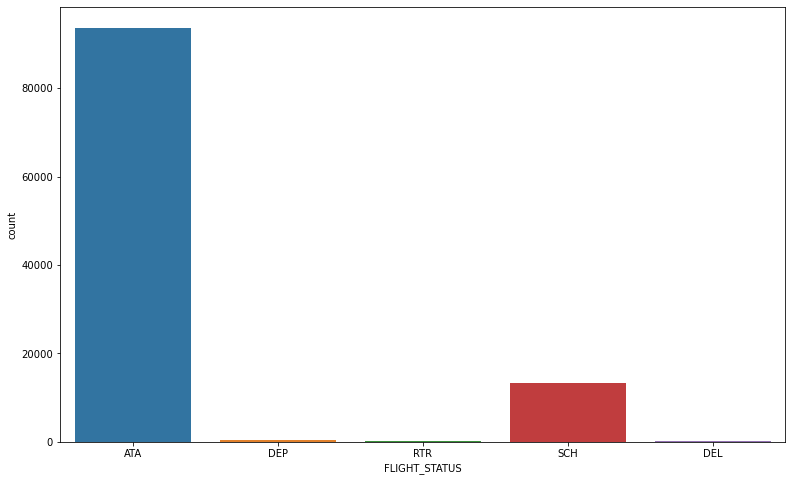

In [49]:
plt.figure(figsize=(13,8))

sns.countplot(x='FLIGHT_STATUS',  data=df_train)

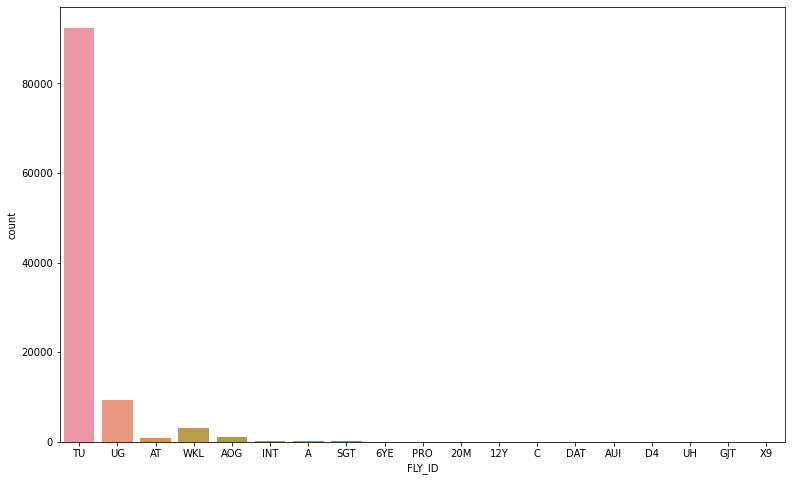

In [50]:
plt.figure(figsize=(13,8))

df_train_fly_id = df_train
df_train_fly_id['FLY_ID'] = df_train['FLY_ID'].str.split(expand=True)[0]
sns.countplot(x='FLY_ID', data=df_train_fly_id)

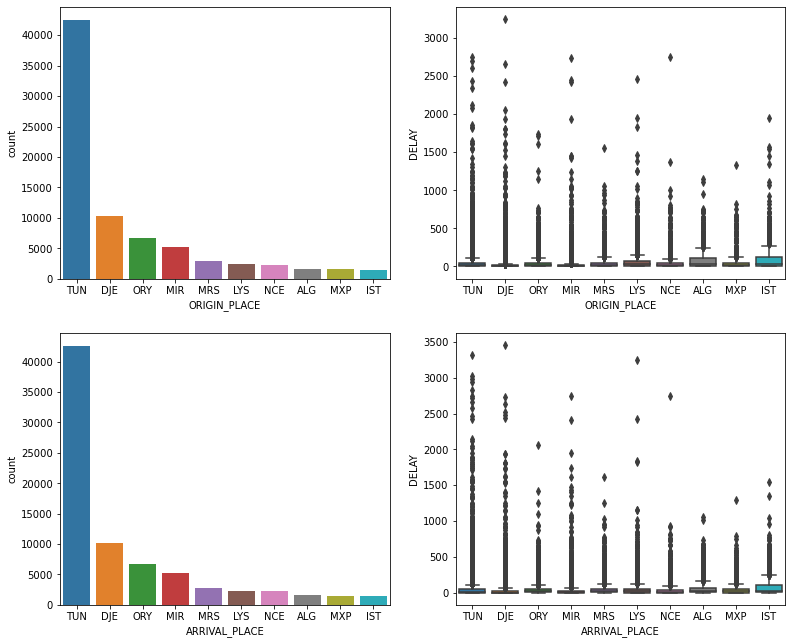

In [51]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(13, 11))

index_top_ten_origin = df_train['ORIGIN_PLACE'].value_counts()[:10].index.tolist()
index_top_ten_arrival = df_train['ARRIVAL_PLACE'].value_counts()[:10].index.tolist()


df_aux = df_train.copy()
df_aux.index = df_train['ORIGIN_PLACE']
sns.countplot(x='ORIGIN_PLACE', data=df_aux.loc[index_top_ten_origin] , ax = axs[0,0])
sns.boxplot(y='DELAY', x='ORIGIN_PLACE', data=df_aux.loc[index_top_ten_origin], ax = axs[0,1])

df_aux.index = df_train['ARRIVAL_PLACE']
sns.countplot(x='ARRIVAL_PLACE', data=df_aux.loc[index_top_ten_arrival] , ax = axs[1,0])
sns.boxplot(y='DELAY', x = 'ARRIVAL_PLACE', data=df_aux.loc[index_top_ten_arrival], ax = axs[1,1])

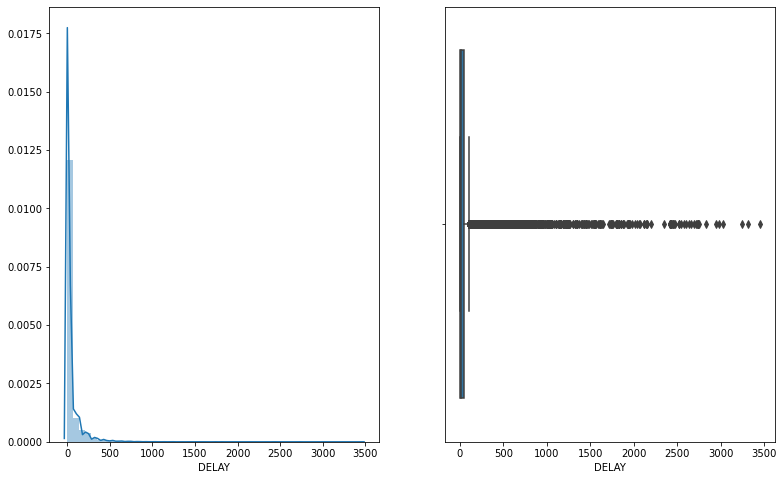

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 8))

sns.distplot(df_train['DELAY'], ax = axs[0])
sns.boxplot(df_train['DELAY'], ax = axs[1])

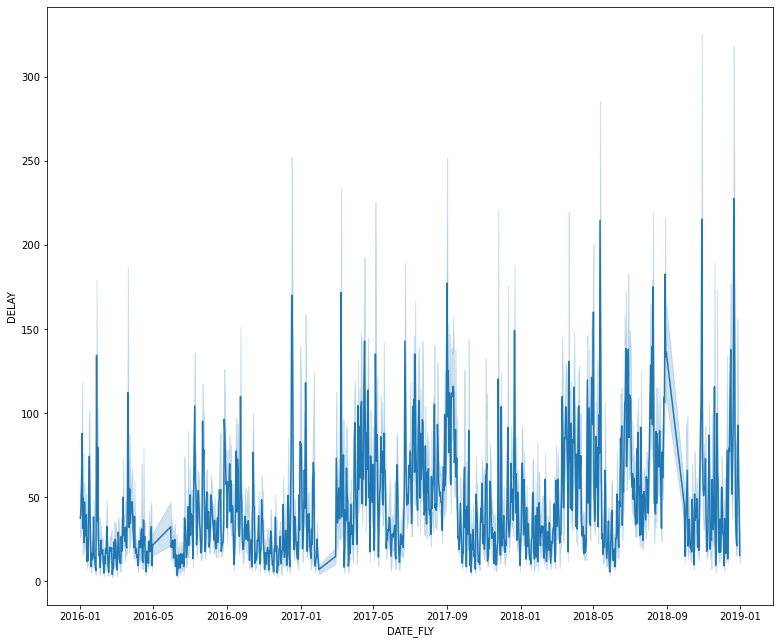

In [53]:
plt.figure(figsize=(13,11))

sns.lineplot(y=df_train['DELAY'], x =df_train['DATE_FLY'])